__________________________________________
# ***I) Projet 1 : Segmentation clientèle***
_____________________________________________

_
Ce projet vise à appliquer des techniques de **clustering (apprentissage non supervisé)**
afin de segmenter les clients d’un centre commercial en groupes homogènes.

_La segmentation permet de mieux comprendre le comportement des clients
et de proposer des stratégies marketing adaptées à chaque segment.


## *Objectif du projet*

L'objectif principal est d'identifier des groupes de clients similaires en fonction de leurs caractéristiques, notamment :

- Âge,

- Sexe,

- Revenu annuel,

- Niveau de dépenses.

Ces segments contribueront à améliorer la prise de décision marketing et à proposer des stratégies marketing personnalisées pour chaque client.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (7,5)


## *Chargement des données*

Le dataset utilisé est **Mall Customers Dataset**, qui contient des informations
sur 200 clients d’un centre commercial.


In [ ]:
df = pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## *Exploration des données*

Cette étape permet de comprendre la structure du dataset,
les types de variables et les statistiques descriptives.


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


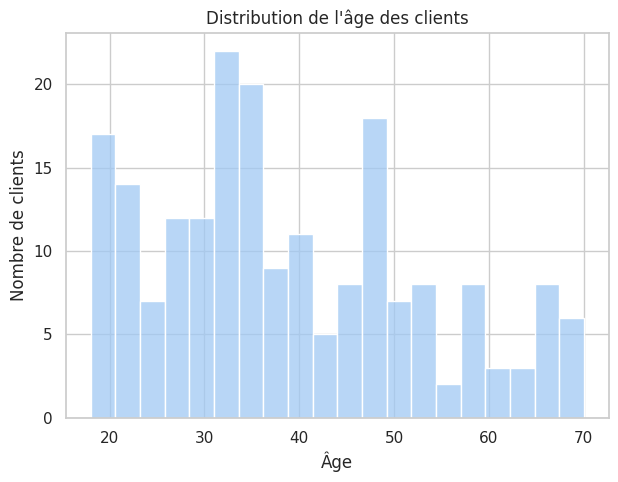

In [ ]:
plt.figure()
sns.histplot(df['Age'], bins=20)
plt.title("Distribution de l'âge des clients")
plt.xlabel("Âge")
plt.ylabel("Nombre de clients")
plt.show()


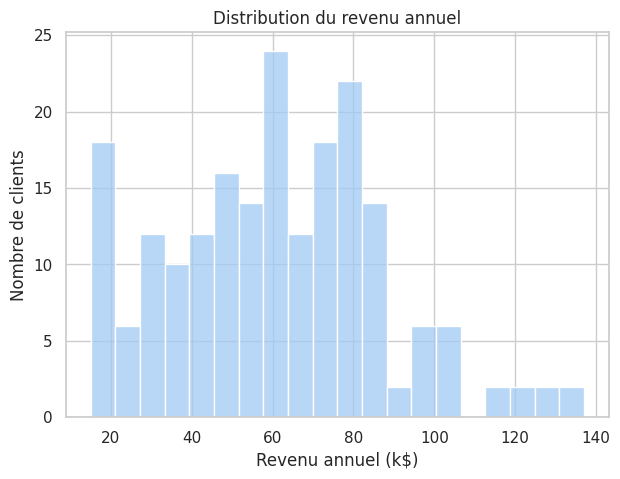

In [ ]:
plt.figure()
sns.histplot(df['Annual Income (k$)'], bins=20)
plt.title("Distribution du revenu annuel")
plt.xlabel("Revenu annuel (k$)")
plt.ylabel("Nombre de clients")
plt.show()


## *Sélection des variables*

Pour la segmentation, nous utilisons :
- le revenu annuel,
- le score de dépense.

Ces variables sont directement liées au comportement d’achat des clients.


In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


## **Méthode 1 : K-Means Clustering 🥇**

K-Means est une méthode de clustering qui regroupe les données
en **K clusters** en minimisant la distance entre les points et le centre du cluster.


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(X)



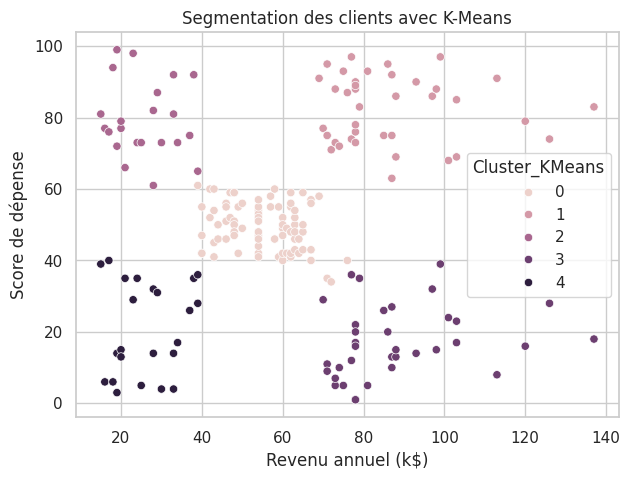

In [ ]:
plt.figure()
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster_KMeans',
    data=df
)
plt.title("Segmentation des clients avec K-Means")
plt.xlabel("Revenu annuel (k$)")
plt.ylabel("Score de dépense")
plt.show()


## **Méthode 2 : Agglomerative Clustering 🥈**

Agglomerative Clustering est une méthode de **clustering hiérarchique**.
Chaque observation commence comme un cluster individuel,
puis les clusters les plus proches sont fusionnés progressivement.


In [ ]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=5)
df['Cluster_Agglo'] = agglo.fit_predict(X)


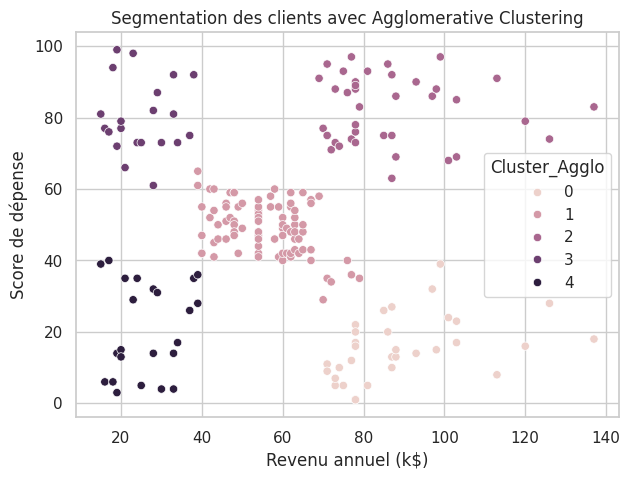

In [ ]:
plt.figure()
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster_Agglo',
    data=df
)
plt.title("Segmentation des clients avec Agglomerative Clustering")
plt.xlabel("Revenu annuel (k$)")
plt.ylabel("Score de dépense")
plt.show()


## *Interprétation des résultats*

Les deux méthodes de clustering permettent d’identifier des groupes
de clients aux comportements similaires.

- Certains clusters regroupent des clients à **revenu élevé et score de dépense élevé** (clients VIP).
- D’autres clusters représentent des clients à **faible revenu et faible score de dépense**.
- On observe également des clients avec un revenu élevé mais un score de dépense faible.

Les résultats obtenus par K-Means et Agglomerative Clustering sont globalement similaires, avec quelques différences dues aux méthodes de calcul.


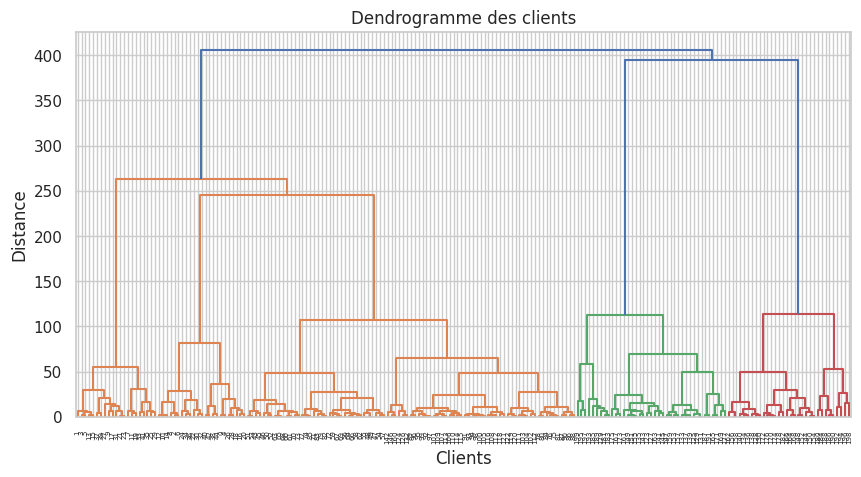

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X, method='ward')

plt.figure(figsize=(10,5))
dendrogram(linked)
plt.title("Dendrogramme des clients")
plt.xlabel("Clients")
plt.ylabel("Distance")
plt.show()

## *Recommandations marketing*

- Proposer des **offres premium** aux clients avec un score de dépense élevé.
- Mettre en place des **promotions ciblées** pour les clients à faible revenu.
- Cibler les clients jeunes avec des campagnes sur les **réseaux sociaux**.
- Adapter les stratégies de fidélisation selon chaque segment identifié.


## *Conclusion*

La segmentation clientèle est un outil essentiel pour comprendre le comportement des clients.
Grâce aux techniques de clustering, il est possible d’identifier des groupes homogènes
et d’optimiser les stratégies marketing.

Ce projet démontre l’intérêt de l’apprentissage non supervisé
dans l’analyse des données clients.


_________________________________________________
# ***II) Projet 2 : Détection de fraude par carte de crédit***
______________________________________________________

_Ce projet vise à construire un modèle de **classification supervisée**
capable de détecter automatiquement les transactions frauduleuses
à partir de données réelles de transactions par carte de crédit.

_La détection de fraude est un problème crucial dans le domaine financier,
où les données sont fortement déséquilibrées.


## *Objectif du projet*

Ce projet vise à concevoir un modèle de classification supervisée capable de détecter automatiquement les transactions frauduleuses à partir de données de cartes de crédit, et à développer un système permettant de corriger les déséquilibres de données entre les catégories et d'évaluer les performances à l'aide d'indicateurs pertinents.

La principale difficulté de ce projet réside dans le déséquilibre des données entre les catégories, les transactions frauduleuses ne représentant qu'un très faible pourcentage des données.


In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv("creditcard.csv")
df.head()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29799 entries, 0 to 29798
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    29799 non-null  int64  
 1   V1      29799 non-null  float64
 2   V2      29799 non-null  float64
 3   V3      29799 non-null  float64
 4   V4      29799 non-null  float64
 5   V5      29799 non-null  float64
 6   V6      29798 non-null  float64
 7   V7      29798 non-null  float64
 8   V8      29798 non-null  float64
 9   V9      29798 non-null  float64
 10  V10     29798 non-null  float64
 11  V11     29798 non-null  float64
 12  V12     29798 non-null  float64
 13  V13     29798 non-null  float64
 14  V14     29798 non-null  float64
 15  V15     29798 non-null  float64
 16  V16     29798 non-null  float64
 17  V17     29798 non-null  float64
 18  V18     29798 non-null  float64
 19  V19     29798 non-null  float64
 20  V20     29798 non-null  float64
 21  V21     29798 non-null  float64
 22

In [6]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,29799.000000,29799.000000,29799.000000,29799.000000,29799.000000,29799.000000,29798.000000,29798.000000,29798.000000,29798.000000,...,29798.000000,29798.000000,29798.000000,29798.000000,29798.000000,29798.000000,29798.000000,29798.000000,29798.000000,29798.000000
mean,21415.425719,-0.209312,0.125470,0.720538,0.213023,-0.203808,0.089008,-0.121495,0.030902,0.351012,...,-0.033872,-0.123746,-0.041956,0.009204,0.132632,0.022783,0.012362,0.004780,79.620566,0.003155
std,12038.537147,1.845781,1.543515,1.613657,1.418989,1.419221,1.321267,1.291495,1.287706,1.257026,...,0.786840,0.640527,0.540717,0.591995,0.435684,0.511026,0.388416,0.273684,222.110430,0.056078
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-9.617915,0.000000,0.000000
25%,10122.000000,-0.951024,-0.446725,0.261163,-0.697463,-0.798822,-0.653976,-0.595929,-0.160211,-0.456677,...,-0.244970,-0.546113,-0.176410,-0.327428,-0.129629,-0.334686,-0.063502,-0.007942,6.540000,0.000000
50%,26182.000000,-0.249361,0.149599,0.844654,0.197721,-0.237290,-0.171222,-0.068568,0.035759,0.244841,...,-0.090713,-0.096810,-0.050365,0.062233,0.172286,-0.057223,0.008246,0.020445,20.000000,0.000000
75%,32195.000000,1.165752,0.788149,1.473903,1.096170,0.312701,0.475508,0.444292,0.294166,1.106549,...,0.083442,0.285024,0.075052,0.398687,0.415022,0.303728,0.089536,0.076514,70.750000,0.000000
max,35634.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,13.876221,4.014444,5.525093,3.517346,11.135740,4.860769,7879.420000,1.000000


In [7]:
df['Class'].value_counts()

,count
Class,
0.0,29704
1.0,94


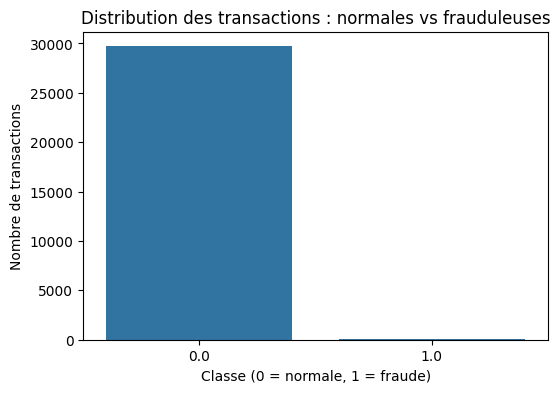

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title("Distribution des transactions : normales vs frauduleuses")
plt.xlabel("Classe (0 = normale, 1 = fraude)")
plt.ylabel("Nombre de transactions")
plt.show()


-
On observe un fort déséquilibre des classes.
Les transactions frauduleuses représentent une part extrêmement faible du dataset,
ce qui rend la détection de fraude particulièrement complexe.

In [16]:
X = df.drop('Class', axis=1)
y = df['Class']


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


- La normalisation est indispensable afin d’assurer une convergence correcte des modèles de classification sensibles à l’échelle des données.


In [18]:
np.isnan(X_scaled).sum()


np.int64(24)

In [19]:
y.isna().sum()


np.int64(1)

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [23]:
df = df.dropna()


In [24]:
X = df.drop('Class', axis=1)
y = df['Class']


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [27]:
y.isna().sum()


np.int64(0)

- Certaines valeurs manquantes ont été détectées dans la variable cible.
Les lignes correspondantes ont été supprimées afin d'assurer un apprentissage fiable du modèle.
.


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


## *Modèle : Logistic Regression*

La régression logistique est un modèle simple mais efficace
pour les problèmes de classification binaire.

In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    class_weight='balanced',
    max_iter=1000
)

model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [30]:
y_pred = model.predict(X_test)


In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      5941
         1.0       0.14      0.95      0.24        19

    accuracy                           0.98      5960
   macro avg       0.57      0.96      0.62      5960
weighted avg       1.00      0.98      0.99      5960



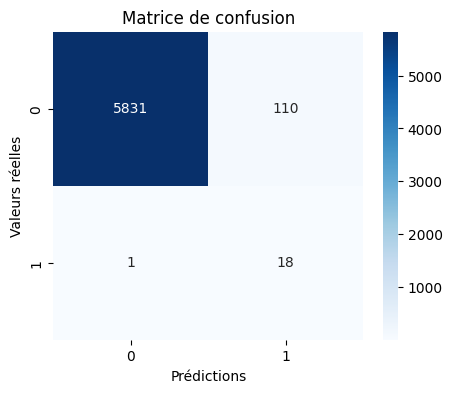

In [32]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédictions")
plt.ylabel("Valeurs réelles")
plt.title("Matrice de confusion")
plt.show()


## *Interprétation des résultats*

Le modèle présente une bonne capacité à détecter les transactions frauduleuses,
grâce à l’utilisation du paramètre `class_weight='balanced'`.

Cependant, certaines transactions normales peuvent être faussement classées comme
frauduleuses, ce qui reste acceptable dans un contexte bancaire où la sécurité est prioritaire.


## *Améliorations possibles*

- Utiliser des modèles plus complexes comme Random Forest ou XGBoost
- Appliquer des techniques de rééquilibrage comme SMOTE
- Ajuster le seuil de décision
- Utiliser AutoML pour optimiser automatiquement les pipelines


## *Conclusion*

La détection de fraude est un problème complexe
nécessitant une attention particulière au déséquilibre des données.

Ce projet montre comment construire un modèle de classification supervisée,
l’évaluer et identifier des pistes d’amélioration.


_________________________________________________________
# ***III) Mini état de l’art sur AutoML***
____________________________________________________________

## **Qu’est-ce que l’AutoML** ?

AutoML (Automated Machine Learning) désigne l’ensemble des techniques visant
à automatiser les différentes étapes du processus de Machine Learning,
telles que :

- le prétraitement des données
- la sélection des modèles
- l’optimisation des hyperparamètres
- la construction de pipelines performants

L’objectif principal de l’AutoML est de rendre le Machine Learning plus accessible
et plus efficace, tout en réduisant le temps et l’expertise nécessaires.


## **Pourquoi utiliser AutoML** ?

L’utilisation d’AutoML présente plusieurs avantages :

- Gain de temps considérable
- Exploration automatique de nombreux modèles
- Optimisation des performances
- Réduction des erreurs humaines

Cependant, AutoML peut être coûteux en ressources de calcul
et parfois moins interprétable qu’une approche manuelle.


## **TPOT**

*TPOT* (Tree-based Pipeline Optimization Tool) est une bibliothèque AutoML
basée sur des algorithmes génétiques.

Elle permet de rechercher automatiquement le meilleur pipeline de Machine Learning
en combinant :
- des modèles
- des transformations de données
- des hyperparamètres optimisés

### Avantages :
- Facile à utiliser
- Compatible avec scikit-learn
- Génère un pipeline reproductible

### Limites :
- Temps de calcul élevé
- Consommation importante de ressources


## **Auto-sklearn**

Auto-sklearn est une bibliothèque AutoML basée sur la méthode SMBO
(Sequential Model-Based Optimization).

Elle automatise :
- la sélection du modèle
- l’optimisation des hyperparamètres
- l’assemblage de modèles (ensemble learning)

### Avantages :
- Excellentes performances
- Gestion avancée des hyperparamètres

### Limites :
- Installation plus complexe
- Temps d’exécution long


____________________________________________________________________
# ***IV) Application de l’AutoML sur le Projet 2***
__________________________________________________________________________

- Les données utilisées pour l’AutoML sont préparées de la même manière
que pour l’approche manuelle afin de garantir une comparaison équitable.


In [2]:
!pip install tpot


In [ ]:
from tpot import TPOTClassifier

tpot = TPOTClassifier(
    generations=2,
    population_size=10,
    random_state=42
)

tpot.fit(X_train, y_train)





/usr/local/lib/python3.12/dist-packages/tpot/tpot_estimator/estimator.py:458: UserWarning: Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.
  warnings.warn("Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.")
/usr/local/lib/python3.12/dist-packages/distributed/node.py:188: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 45503 instead
  warnings.warn(
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:45877
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:45503/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:32793'
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:43421 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:43421
INFO:dis

- Afin de limiter le temps de calcul sur Google Colab,
les paramètres de TPOT ont été volontairement réduits.
Cette configuration reste suffisante pour illustrer
le fonctionnement de l’AutoML et obtenir un pipeline performant.


In [38]:
y_pred_tpot = tpot.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_tpot))



              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5941
         1.0       0.67      0.84      0.74        19

    accuracy                           1.00      5960
   macro avg       0.83      0.92      0.87      5960
weighted avg       1.00      1.00      1.00      5960



- Les résultats obtenus avec TPOT montrent les performances du pipeline généré automatiquement
en termes de précision, rappel et F1-score pour la détection des fraudes.



## *Comparaison avec le modèle manuel*

Le modèle AutoML est comparé au modèle manuel (Logistic Regression)
afin d’évaluer l’apport de l’automatisation dans la construction des pipelines.

Dans certains cas, AutoML permet d’obtenir de meilleures performances,
tandis que dans d’autres, les résultats restent comparables mais avec
une complexité plus élevée.


- Globalement, AutoML permet d’explorer automatiquement des combinaisons
que l’approche manuelle ne teste pas systématiquement.


In [39]:
tpot.fitted_pipeline_



Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('rfe',
                 RFE(estimator=ExtraTreesClassifier(bootstrap=np.False_,
                                                    criterion=np.str_('gini'),
                                                    max_features=0.4503212524738,
                                                    min_samples_leaf=4,
                                                    min_samples_split=7,
                                                    n_jobs=1, random_state=42),
                     step=0.9162776237062)),
                ('featureunion-1',
                 FeatureUnion(transformer_list=[('featureunion',
                                                 FeatureUnion(transformer_list=[(...
                               feature_types=None, feature_weights=None,
                               gamma=0.0153706668713, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.0354272416933, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=10,
                               max_leaves=None, min_child_weight=15,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=100, n_jobs=1,
                               nthread=1, ...))])

- Le pipeline final sélectionné par TPOT comprend plusieurs étapes
de prétraitement et un modèle de classification optimisé automatiquement.

Ce pipeline représente la meilleure combinaison trouvée par AutoML
selon les critères internes d’évaluation.


## *Description du pipeline AutoML*

Le pipeline généré automatiquement par TPOT est composé de plusieurs étapes
incluant des transformations de données ainsi qu’un modèle de classification
optimisé.

Ce pipeline représente la meilleure combinaison trouvée automatiquement
par AutoML afin de maximiser les performances de détection des fraudes.

Les étapes principales du pipeline incluent :
- Prétraitement des données
- Sélection automatique du modèle
- Optimisation des hyperparamètres

Cette approche permet d’obtenir un modèle performant sans intervention humaine
dans le choix du modèle ou des paramètres.


## *Comparaison finale*

En comparant l’approche manuelle et l’approche AutoML, on constate que :

- L’approche manuelle offre plus de contrôle et de simplicité.
- L’approche AutoML permet d’explorer automatiquement des combinaisons plus complexes.
- Les performances obtenues par AutoML sont comparables ou légèrement supérieures.

AutoML constitue donc un outil très utile pour accélérer la construction
de modèles de Machine Learning.


In [41]:
import joblib
joblib.dump(tpot.fitted_pipeline_, "tpot_pipeline.pkl")



['tpot_pipeline.pkl']

# ***Résumé général***

Ce travail a permis l'application de techniques d'apprentissage automatique pour segmenter les clients et détecter les fraudes.

L'intégration de l'apprentissage automatique automatisé (AutoML) a démontré la valeur de l'automatisation dans l'optimisation des modèles, tout en soulignant l'importance de la compréhension humaine du problème.

L'utilisation de l'apprentissage automatique automatisé via TPOT a permis la création automatisée d'un flux de travail performant sans intervention humaine directe dans la sélection du modèle et des hyperparamètres.

Ce projet a fourni une vue d'ensemble complète du processus d'apprentissage automatique, de l'exploration des données à l'automatisation du modèle.